In [5]:
# Imports mnist dataset
from keras.datasets import mnist

# calls load command
(X, y), (X_test, y_test) = mnist.load_data()

# prints shape
print('Train: X=%s, y=%s' % (X.shape, y.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


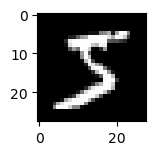

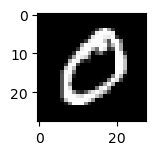

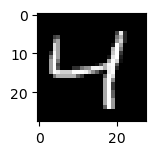

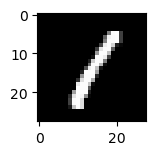

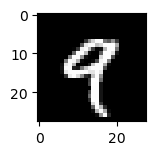

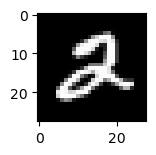

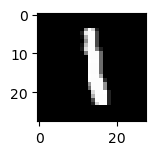

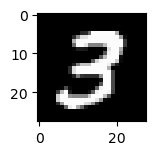

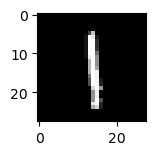

In [6]:
# imports matplotlib
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [7]:
# Imports libraries and packages
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
sns.set_theme()

# Scikit-Learn tools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# ML Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Dictionary that will hold the accuracy values 
dict_acc = {}

#Reshapes data
X = X.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# Create train and validation data
(X_train, X_validation, y_train, y_validation) = train_test_split(X, y, random_state=0)

print(X_train.shape, X_validation.shape)


(45000, 784) (15000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

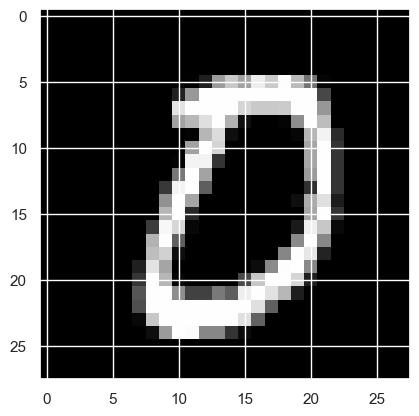

In [9]:
plt.imshow(X_train[5000].reshape(28,28), cmap='gray')

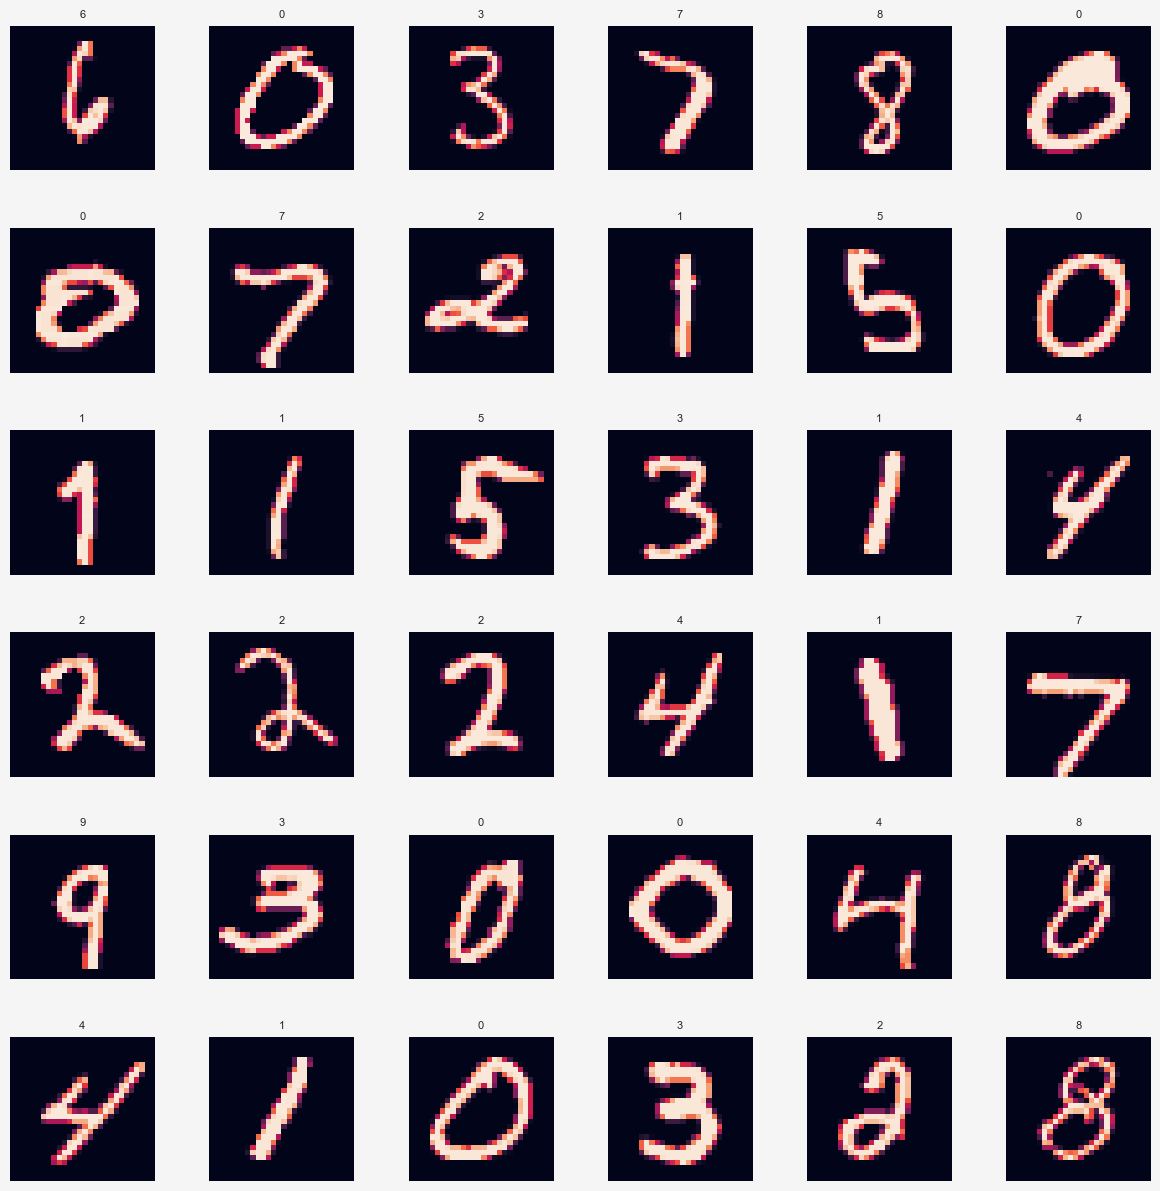

In [12]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

fig.patch.set_facecolor('whitesmoke')

axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index].reshape(28,28))
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
